C:\Users\chali\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\chali\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


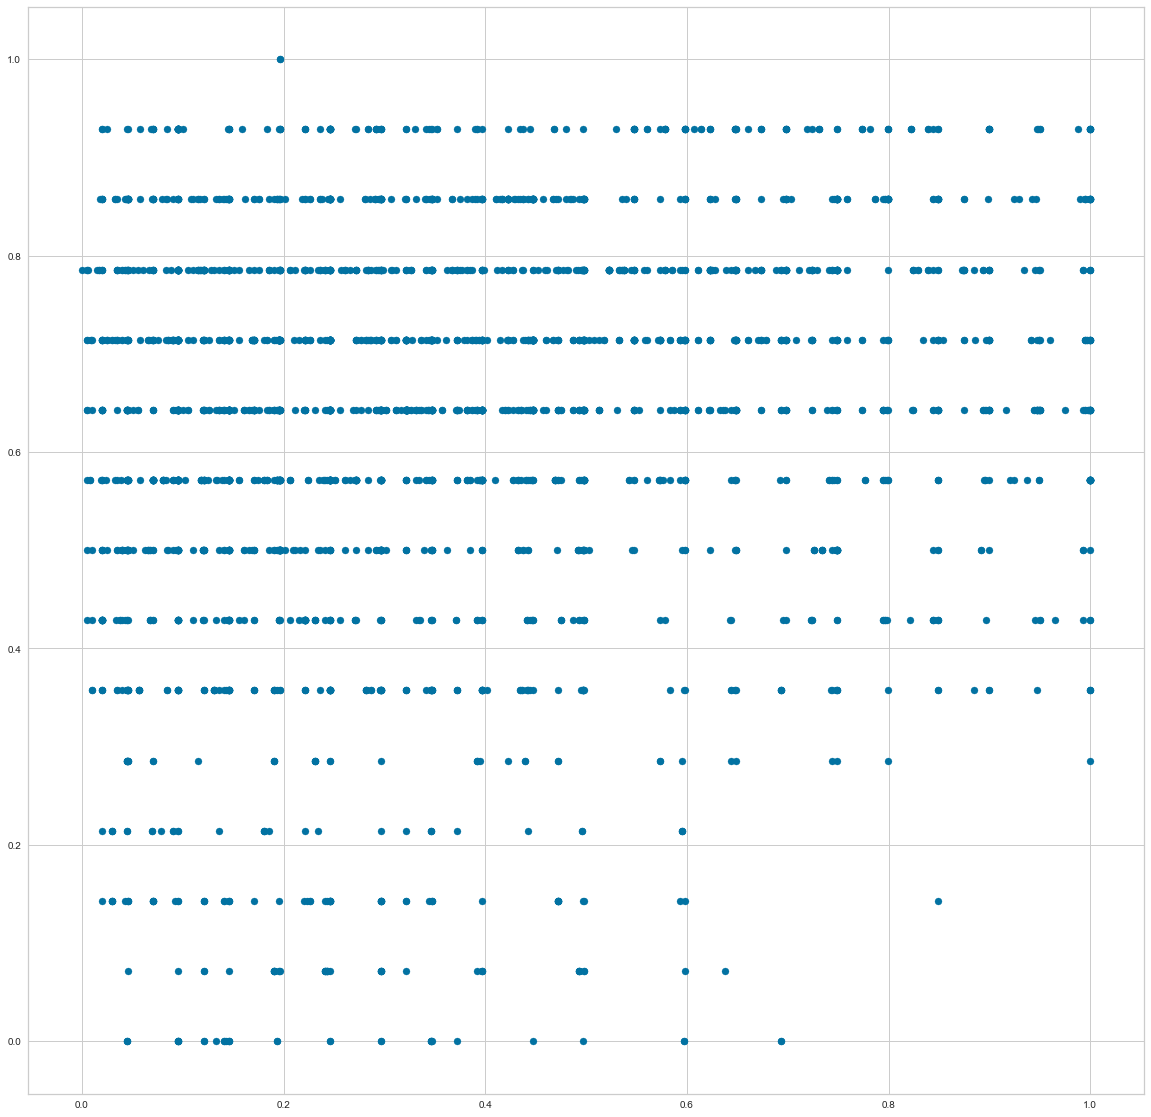

In [15]:
import pandas as pd
import numpy as np
import random
import operator
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing

# import data csv
data = pd.read_csv('used_cars.csv')
data1 = data[['price','year','manufacturer']]

# membersihkan data
data1.isna().sum()
data1.dropna(inplace=True)
data1['price'].describe()
data0 = data1[data1['year'] > 2005]
data2 = data0[data0['price'] < 40000]
data3 = data2[data1['price'] > 20000]

# mengubah data menjadi float
minmax = preprocessing.MinMaxScaler().fit_transform(data3.drop('manufacturer', axis=1))
data3 = pd.DataFrame(minmax, index=data3.index, columns=data3.columns[:-1])

# print(data3)
# plot data berdasarkan harga dan tahun
plt.scatter(data3['price'], data3['year'])
# data3['price'].max()

# data3.isna().sum()

In [16]:
!pip install yellowbrick

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000233017B7AC8>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

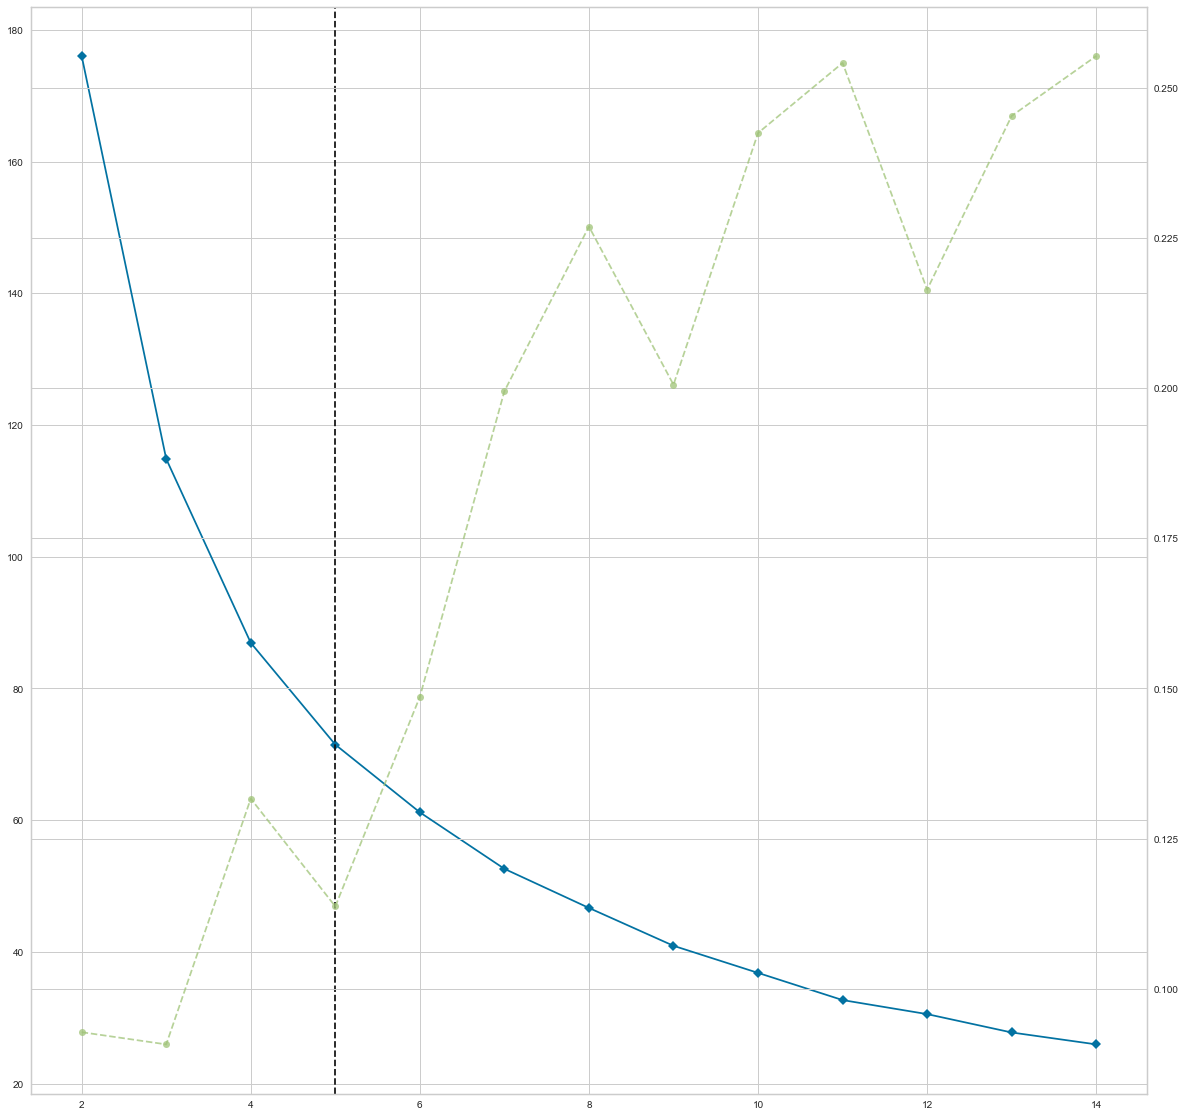

In [17]:
# mencari berapa k yang tepat untuk masalah ini
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(data3)

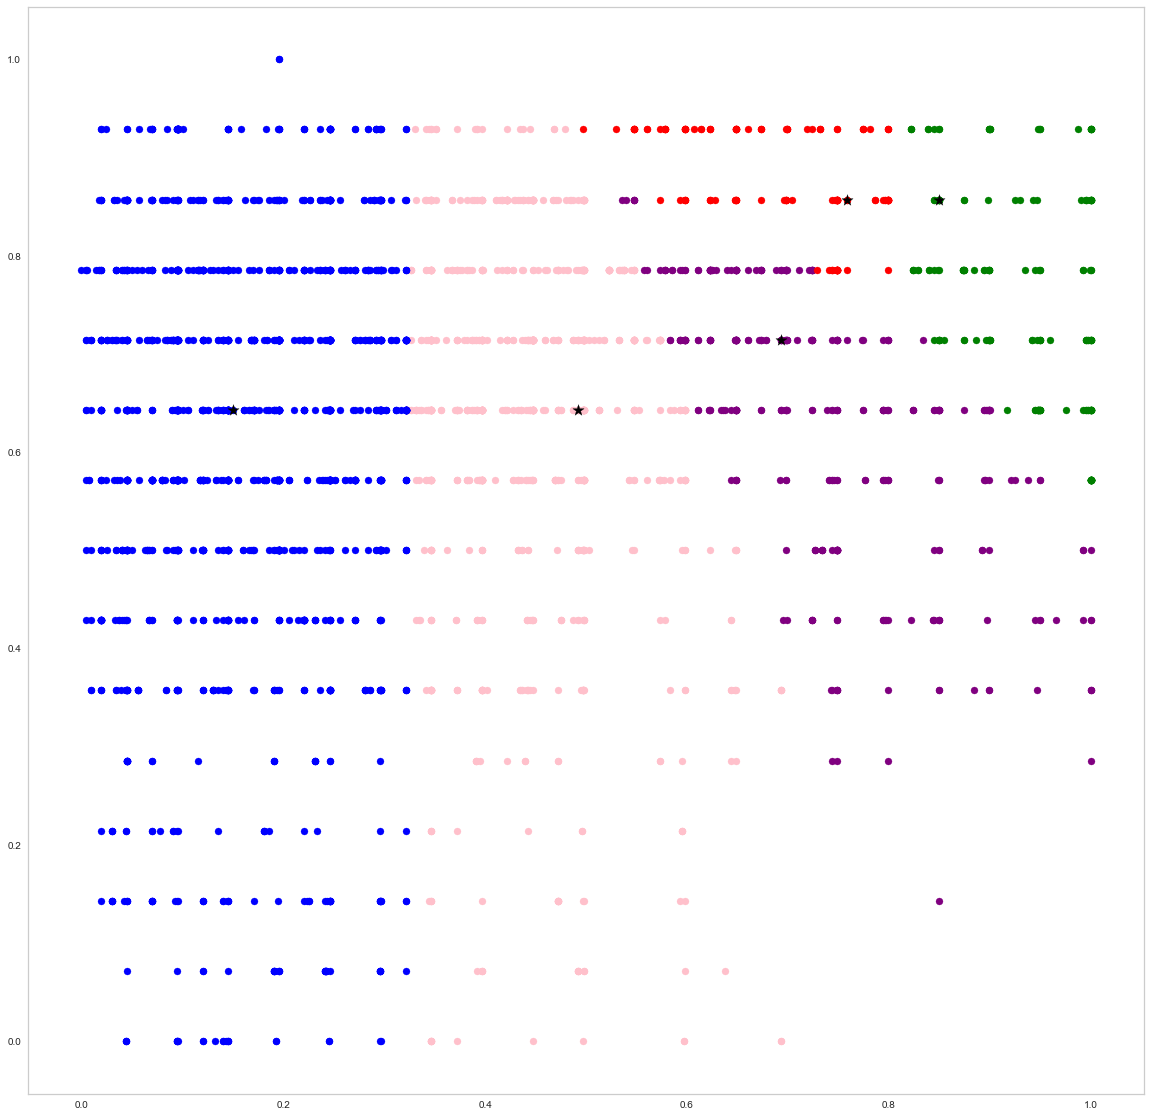

Final Count: 16


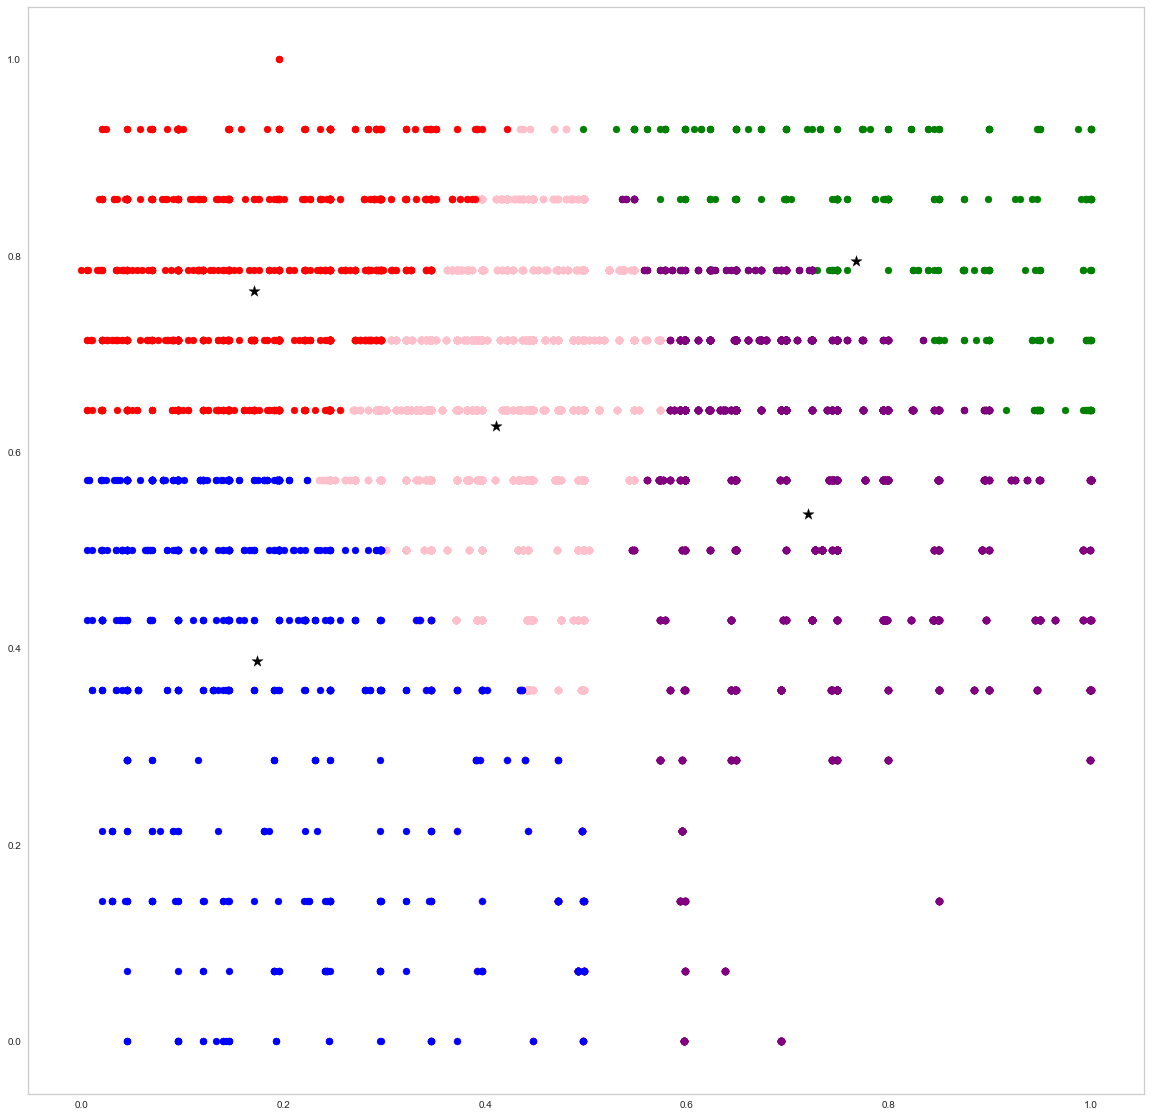

In [22]:
centeroid = []
x = []
y = []
lists = data3.values.tolist()
for j in range(5):
    c = random.randint(0,len(lists))
    centeroid.append(lists[c])
    
centeroids = np.array(centeroid)


for i in range(len(lists)):
    x.append(lists[i][0])
    y.append(lists[i][1])
    


c1 = []
c2 = []
c3 = []
c4 = []
c5 = []
# c6 = []
C1x = []
C2x = []
C3x = []
C4x = []
C5x = []
# C6x = []
C1y = []
C2y = []
C3y = []
C4y = []
C5y = []
# C6y = []

changing = True

def draw():
    from pylab import rcParams
    rcParams['figure.figsize'] = 20, 20
    plt.scatter(C5x, C5y, c="pink")
    plt.scatter(C3x, C3y, c="green")
    plt.scatter(C4x, C4y, c="purple")
    plt.scatter(C2x, C2y, c="red")
    plt.scatter(C1x, C1y, c="blue")
    
#     plt.scatter(C6x, C6y, c="yellow")
    plt.grid()
    for i in centeroids:
        plt.scatter(i[0], i[1], 140, marker="*", c="black")
    plt.show()

def assign_Point():
    c1.clear();c2.clear();c3.clear();c4.clear;c5.clear;
    for pnt in range(len(lists)):#for each point in the grid
        distances = []
        for i in centeroids:
            #find distance to point using equation (2.1)
            distances.append(((i[0] - x[pnt]) ** 2 + (i[1] - y[pnt]) ** 2) ** 0.5)

        #what is the nearest distance
        nearest = distances.index(min(distances))
#         print(nearest)
        #assign the point to its closest centroid
        if nearest == 0:
            c1.append(pnt)
        elif nearest == 1:
            c2.append(pnt)
        elif nearest == 2:
            c3.append(pnt)
        elif nearest == 3:
            c4.append(pnt)
        else:
            c5.append(pnt)
    mod() #run function to create arrays with (x,y) coordenates for each centroid
    #arrays called C1x, C1y, C2x, C2y, C3x, C3y

def mod():
    C1x.clear();C1y.clear();C2x.clear();C2y.clear();C3x.clear();C3y.clear();C4x.clear();C4y.clear();C5x.clear();C5y.clear();
    for i in c1:
        C1x.append(x[i])
        C1y.append(y[i])
    for i in c2:
        C2x.append(x[i])
        C2y.append(y[i])
    for i in c3:
        C3x.append(x[i])
        C3y.append(y[i])
    for i in c4:
        C4x.append(x[i])
        C4y.append(y[i])
    for i in c5:
        C5x.append(x[i])
        C5y.append(y[i])
        
def move_centroid():
    old_centeroids = centeroids.copy()
    #recenter the centroid at mean of dimention
    #effective use of equation (3.1)
    if len(c1) != 0:
        (centeroids[0])[0] = np.mean(C1x)
        (centeroids[0])[1] = np.mean(C1y)
    if len(c2) != 0:
        (centeroids[1])[0] = np.mean(C2x)
        (centeroids[1])[1] = np.mean(C2y)
    if len(c3) != 0:
        (centeroids[2])[0] = np.mean(C3x)
        (centeroids[2])[1] = np.mean(C3y)
    if len(c4) != 0:
        (centeroids[3])[0] = np.mean(C4x)
        (centeroids[3])[1] = np.mean(C4y)
    if len(c5) != 0:
        (centeroids[4])[0] = np.mean(C5x)
        (centeroids[4])[1] = np.mean(C5y)

    comparison = old_centeroids - centeroids

    if comparison.all() < 0.001:
        #if they didnt move return false to end program
        return False
    else:
        return True
        #if they did move return true to keep going

assign_Point()

# print(c1)
# print(c2)
# print(c3)
# print(c4)
# print(c5)
draw()
count = 0
while changing: #continue running while changing variable is true
    count = count + 1 #add count to measure # of itterations
    assign_Point() #assign the points to closest centroids
    changing = move_centroid()#update centroid location
    #if the centroids didnt move and function returned False end program
    #if count % 5 == 0:
#     print(count)
#     draw() #display updated graph on screen

print("Final Count: " + str(count))
draw()